In [ ]:
!pip install mplsoccer

In [11]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt

from application import SearchApplicationService
from domain import MunkresMatcher, Frame
from infrastructure import S3Repository

plt.style.use('ggplot')

In [12]:
def draw_frame(frame: Frame):
    home_x, home_y = zip(*[
        (point.x, point.y) for point in frame.home_players_coordinates.values()
    ])
    away_x, away_y = zip(*[
        (point.x, point.y) for point in frame.away_players_coordinates.values()
    ])

    pitch = Pitch(figsize=(10, 8), pitch_type="uefa")
    fig, ax = pitch.draw()
    sc = pitch.scatter(home_x + away_x + (frame.ball_coordinates.x, ), home_y + away_y + (frame.ball_coordinates.y, ),
                       c=['blue'] * len(home_x) + ['red'] * len(away_x) + ['black'],
                       s=30, label='scatter', ax=ax)

    plt.show()

In [13]:
repository = S3Repository("teamtv-pydata-demo")

In [14]:
dataset = repository.load("test")

In [15]:
dataset.frames[0]

Frame(frame_id=1, timestamp=0.04, home_players_coordinates={11: Point(x=0.0861, y=32.80184), 1: Point(x=34.2804, y=44.41896), 2: Point(x=35.38605, y=33.22684), 3: Point(x=32.473349999999996, y=24.15972), 4: Point(x=33.74385, y=14.45816), 5: Point(x=43.148700000000005, y=49.36052), 6: Point(x=43.782900000000005, y=32.53324), 7: Point(x=41.08125, y=22.134), 8: Point(x=47.6574, y=14.39832), 9: Point(x=55.33185, y=25.826400000000003), 10: Point(x=58.00515, y=29.42292)}, away_players_coordinates={25: Point(x=95.03444999999999, y=32.27416), 15: Point(x=61.31265, y=14.13992), 16: Point(x=71.0409, y=31.762800000000002), 17: Point(x=70.6755, y=52.00368), 18: Point(x=42.82215, y=41.836999999999996), 19: Point(x=47.7456, y=26.322119999999998), 20: Point(x=58.757999999999996, y=46.086999999999996), 21: Point(x=58.00515, y=29.42292), 22: Point(x=52.57035, y=64.13896), 23: Point(x=45.877649999999996, y=3.40136), 24: Point(x=39.72465, y=18.620440000000002)}, ball_coordinates=Point(x=47.7456, y=26.322

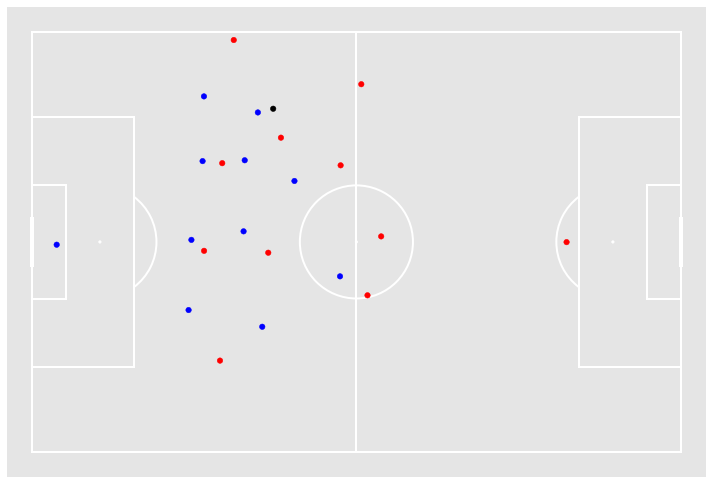

In [16]:
draw_frame(dataset.get_frame_by_id(201))

In [17]:
search_service = SearchApplicationService(
    matcher_cls=MunkresMatcher,
    repository=repository
)

In [18]:
resultset = search_service.search_by_frame(
    "test", 201,
    min_score=0
)

search 3531 items took 0.8165559768676758


In [19]:
resultset


ResultSet(results=[Result(frame_id=21851, score=93.39892238275309), Result(frame_id=176, score=93.08182105858681), Result(frame_id=21676, score=93.0387901997807), Result(frame_id=926, score=93.01316875590761), Result(frame_id=21701, score=93.01121103033422), Result(frame_id=23326, score=93.01027327258078), Result(frame_id=23301, score=92.98327758120095), Result(frame_id=23276, score=92.9081784867384), Result(frame_id=32876, score=92.8697794461091), Result(frame_id=226, score=92.86097318797522), Result(frame_id=1126, score=92.85053726633889), Result(frame_id=23251, score=92.8338087404558), Result(frame_id=1101, score=92.821494494466), Result(frame_id=21651, score=92.80264697254412), Result(frame_id=951, score=92.77885339003959), Result(frame_id=1176, score=92.74759413699236), Result(frame_id=1076, score=92.71761784279768), Result(frame_id=1201, score=92.6865785057171), Result(frame_id=35526, score=92.6711549300735), Result(frame_id=23226, score=92.66015827712194), Result(frame_id=1151, 

In [22]:
reference_frame = dataset.get_frame_by_id(201)
result_frame = dataset.get_frame_by_id(resultset.results[1].frame_id)

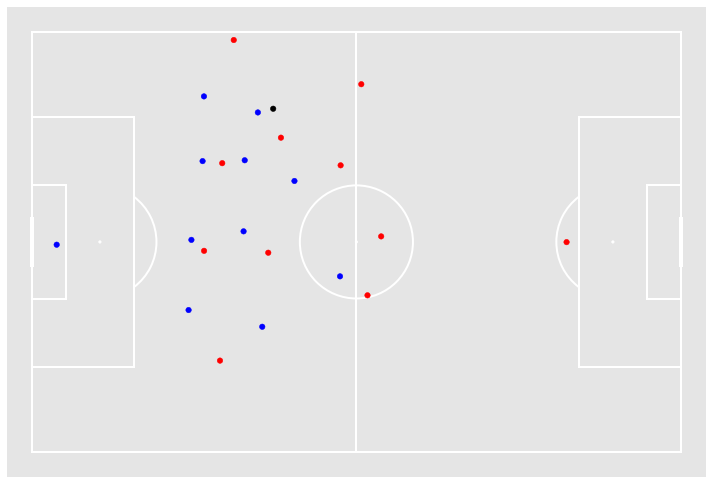

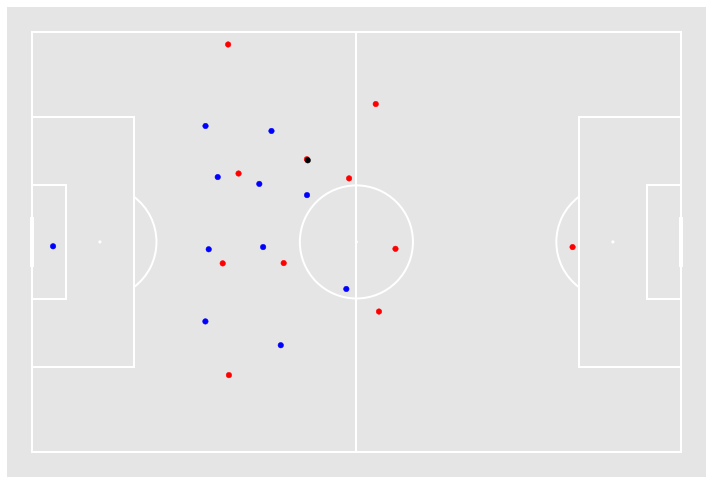

In [23]:
draw_frame(reference_frame)
draw_frame(result_frame)